 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [4]:
# Import libraries and dependencies
import numpy as np
import pandas as pd
from pathlib import Path
import datetime as dt
import seaborn as sns

#downloading from google sheets
import gspread 
from oauth2client.service_account import ServiceAccountCredentials

#preparing to send to Google Sheets
from pandas.io.json import json_normalize

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [5]:
# Reading whale returns

# Set the file paths
whale_data = Path("./Resources/whale_returns.csv")
# Read the CSVs and set the `date` column as a datetime index to the DataFrame
whale_df = pd.read_csv(whale_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_df.sort_index(inplace=True)

In [6]:
# Count nulls
whale_df.isna().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [7]:
# Drop nulls
whale_df.dropna(inplace=True)
whale_df.isna().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [8]:
# Reading algorithmic returns

# Set the file paths
algo_data = Path("./Resources/algo_returns.csv")
# Read the CSVs and set the `date` column as a datetime index to the DataFrame
algo_df = pd.read_csv(algo_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_df.sort_index(inplace=True)

In [9]:
# Count nulls
algo_df.isna().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [10]:
# Drop nulls
algo_df.dropna(inplace=True)
algo_df.isna().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [11]:
# Reading S&P 500 Closing Prices

# Set the file paths
sp500_data = Path("./Resources/sp500_history.csv")
# Read the CSVs and set the `date` column as a datetime index to the DataFrame
sp500_df = pd.read_csv(sp500_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_df.sort_index(inplace=True)

In [12]:
# Check Data Types
sp500_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [13]:
# Fix Data Types
sp500_df['Close'] = sp500_df['Close'].str.replace(',', '')
sp500_df['Close'] = sp500_df['Close'].str.replace('$', '')
sp500_df['Close'] = sp500_df['Close'].astype(float)

/var/folders/hj/kq6jbljs7lb95ftqpmny2y340000gn/T/ipykernel_43917/1022083674.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500_df['Close'] = sp500_df['Close'].str.replace('$', '')


In [14]:
# Calculate Daily Returns
sp500_df_dr = sp500_df.pct_change()
sp500_df_dr

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [15]:
# Drop nulls
sp500_df_dr.dropna(inplace=True)

In [16]:
# Rename `Close` Column to be specific to this portfolio.
sp500_df_dr.rename(columns={"Close": "S&P TSX"}, inplace=True)
sp500_df_dr.sort_index(inplace=True)
sp500_df_dr.head()

,S&P TSX
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [17]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df_list=[whale_df,algo_df,sp500_df_dr]
combined_df = pd.concat(combined_df_list, axis=1, join="inner", sort=True)
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns of Portfolios 2015-2019'}, xlabel='Date'>

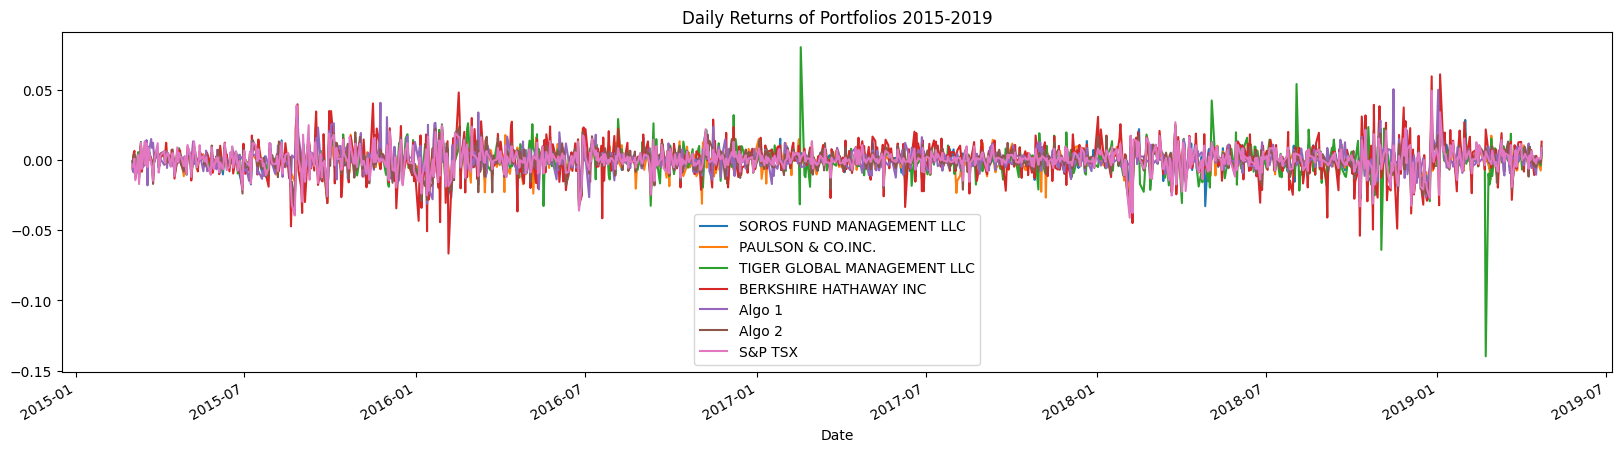

In [18]:
# Plot daily returns of all portfolios
combined_df.plot(figsize=(20,5), title="Daily Returns of Portfolios 2015-2019", legend=True,)

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns of Portfolios 2015-2019'}, xlabel='Date'>

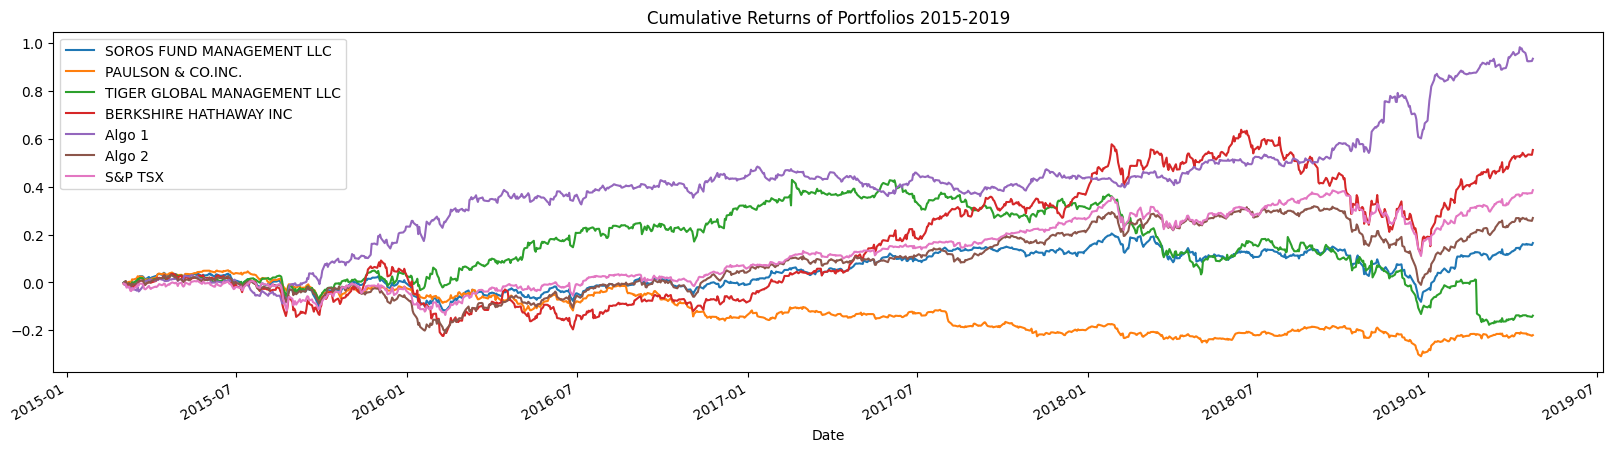

In [19]:
# Calculate cumulative returns of all portfolios
cum_rtn_combined_df = (1 + combined_df).cumprod() - 1
# Plot cumulative returns
cum_rtn_combined_df.plot(figsize=(20,5), title="Cumulative Returns of Portfolios 2015-2019", legend=True)

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


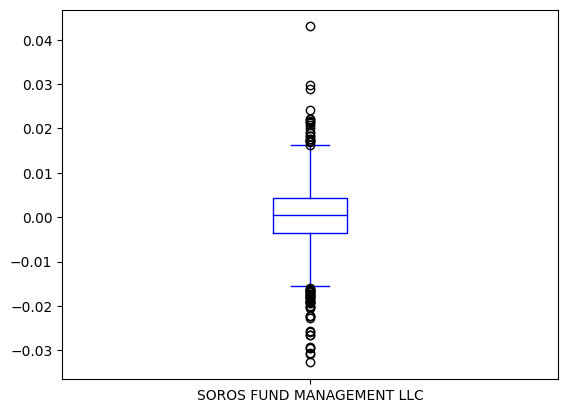

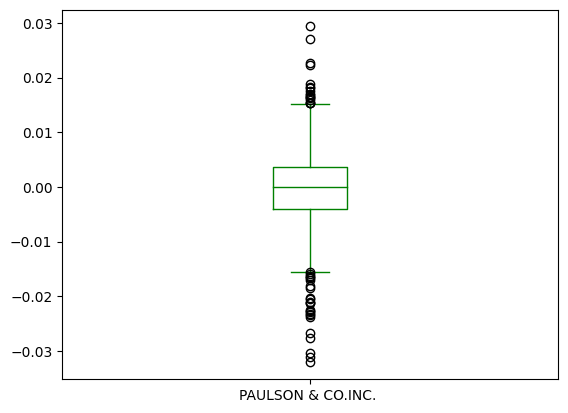

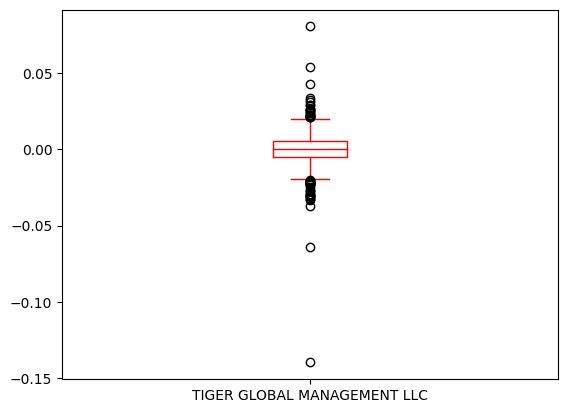

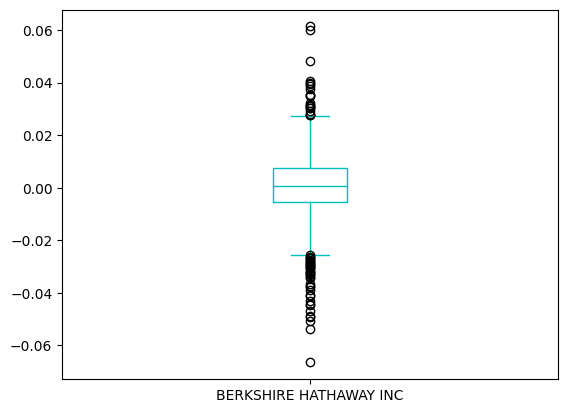

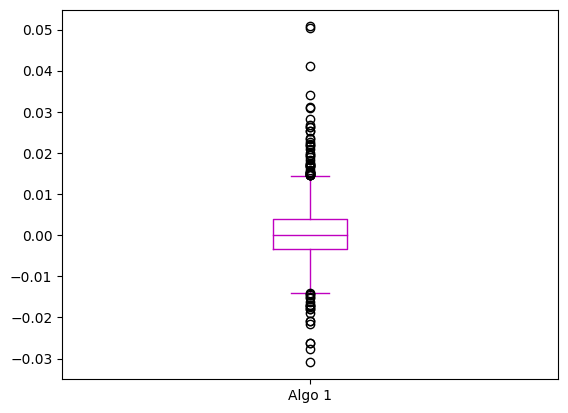

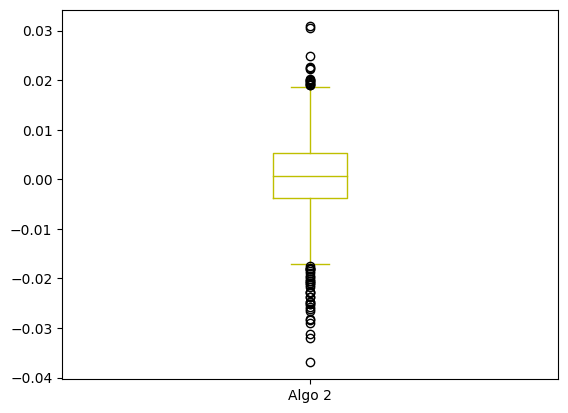

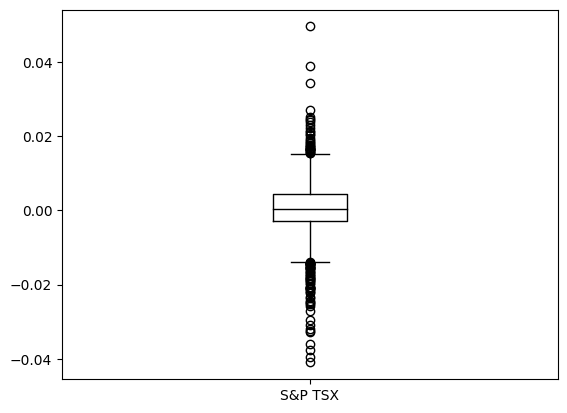

In [20]:
# Box plot to visually show risk
cmb_df_sfm_df=combined_df['SOROS FUND MANAGEMENT LLC'].to_frame()
cmb_df_pci_df=combined_df['PAULSON & CO.INC. '].to_frame()
cmb_df_tgm_df=combined_df['TIGER GLOBAL MANAGEMENT LLC'].to_frame()
cmb_df_bhi_df=combined_df['BERKSHIRE HATHAWAY INC'].to_frame()
cmb_df_alg1_df=combined_df['Algo 1'].to_frame()
cmb_df_alg2_df=combined_df['Algo 2'].to_frame()
cmb_df_sptx_df=combined_df['S&P TSX'].to_frame()
boxplot_sfm = cmb_df_sfm_df.plot.box(color='b')
boxplot_pci = cmb_df_pci_df.plot.box(color='g')
boxplot_tgm = cmb_df_tgm_df.plot.box(color='r')
boxplot_bhi = cmb_df_bhi_df.plot.box(color='c',subplots=True)
boxplot_alg1 = cmb_df_alg1_df.plot.box(color='m',subplots=True)
boxplot_alg2 = cmb_df_alg2_df.plot.box(color='y',subplots=True)
boxplot_sptx = cmb_df_sptx_df.plot.box(color='k',subplots=True)

### Calculate Standard Deviations

In [21]:
# Calculate the daily standard deviations of all portfolios
combined_df_std=combined_df.std()
combined_df_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P TSX                        0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [22]:
# Calculate  the daily standard deviation of S&P 500
combined_df_std_sp500=combined_df['S&P TSX'].std()
combined_df_std_sp500

# Determine which portfolios are riskier than the S&P 500
combined_df_std_dict=combined_df_std.to_dict()
risk_portfolios = [*(dict((k, v) for k, v in combined_df_std_dict.items() if v > combined_df_std_sp500))]
risk_portfolios

['TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC']

### Calculate the Annualized Standard Deviation

In [23]:
# Calculate the annualized standard deviation (252 trading days)
combined_df_ann_std=combined_df.std()*np.sqrt(252)
combined_df_ann_std.head(7)

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P TSX                        0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Rolling StD 21(d) of Portfolios'}, xlabel='Date'>

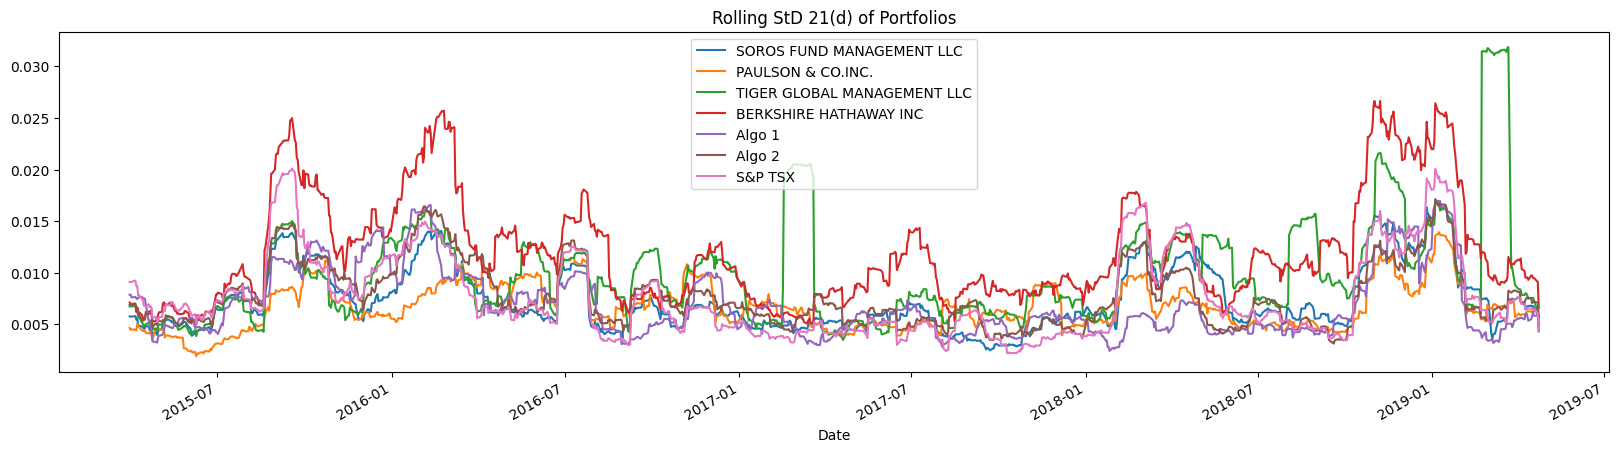

In [24]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_df_roll_std_21W=combined_df.rolling(window=21).std()
# Plot the rolling standard deviation
combined_df_roll_std_21W.plot(figsize=(20,5),title="Rolling StD 21(d) of Portfolios", legend=True)

### Calculate and plot the correlation

<AxesSubplot:>

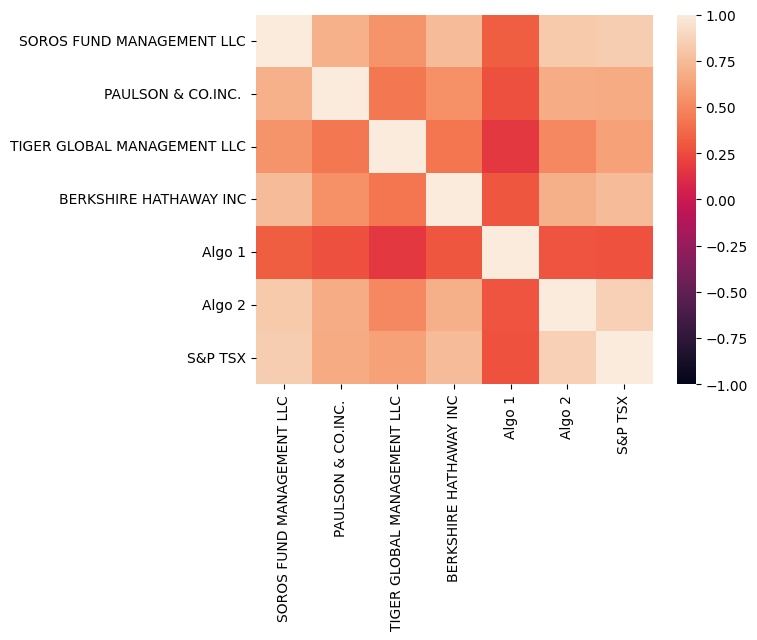

In [25]:
# Calculate the correlation
correlation=combined_df.corr()
# Display de correlation matrix
correlation.head(7)
sns.heatmap(correlation, vmin=-1, vmax=1)
#Soros mimics the S&P the most

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

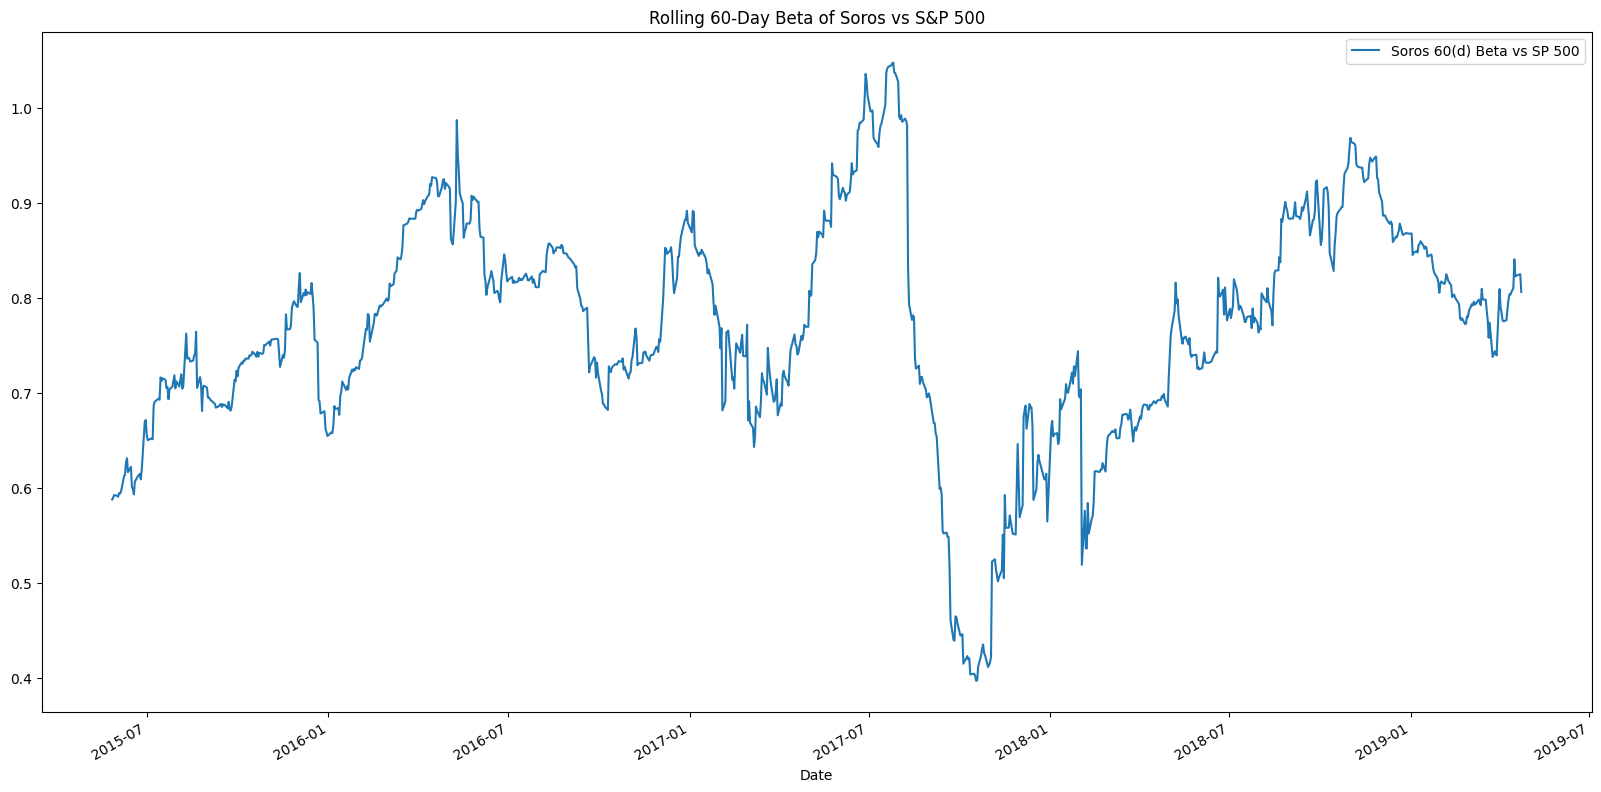

In [26]:
# Calculate covariance of single portfolio Soros vs. S&P 500
soros_covariance = combined_df['SOROS FUND MANAGEMENT LLC'].cov(combined_df['S&P TSX'])
# Calculate variance of S&P 500
variance = combined_df['S&P TSX'].var()
# Computing beta
soros_beta = soros_covariance / variance
# soros_beta

# # Calculate covariance of single portfolio Soros Rolling 60 vs. S&P 500
rolling_soros_covariance = combined_df['SOROS FUND MANAGEMENT LLC'].rolling(window=60).cov(combined_df['S&P TSX'])
# Calculate variance of S&P 500
rolling_variance = combined_df['S&P TSX'].rolling(window=60).var()
# Computing beta
rolling_soros_beta = rolling_soros_covariance / rolling_variance
# Plot beta trend
ax2 = rolling_soros_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Soros vs S&P 500',legend=True)
ax2.legend(["Soros 60(d) Beta vs SP 500"])

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [27]:
# Use `ewm` to calculate the rolling window
cmb_df_sfm=combined_df['SOROS FUND MANAGEMENT LLC']
cmb_df_sptx=combined_df['S&P TSX']
soros_ewm = cmb_df_sfm.ewm(halflife=21).mean().cov(cmb_df_sptx)
sptx_ewm = cmb_df_sptx
soros_ewm_ratio = soros_ewm / sptx_ewm
soros_ewm_ratio

Date
2015-03-03   -0.000347
2015-03-04   -0.000359
2015-03-05    0.001316
2015-03-06   -0.000111
2015-03-09    0.000399
                ...   
2019-04-16    0.003089
2019-04-17   -0.000692
2019-04-18    0.000996
2019-04-22    0.001555
2019-04-23    0.000178
Name: S&P TSX, Length: 1043, dtype: float64

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [28]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios.sort_values(ascending=False, inplace=True)
sharpe_ratios

Algo 1                         1.378648
S&P TSX                        0.648267
BERKSHIRE HATHAWAY INC         0.621810
Algo 2                         0.501364
SOROS FUND MANAGEMENT LLC      0.356417
TIGER GLOBAL MANAGEMENT LLC   -0.121060
PAULSON & CO.INC.             -0.483570
dtype: float64

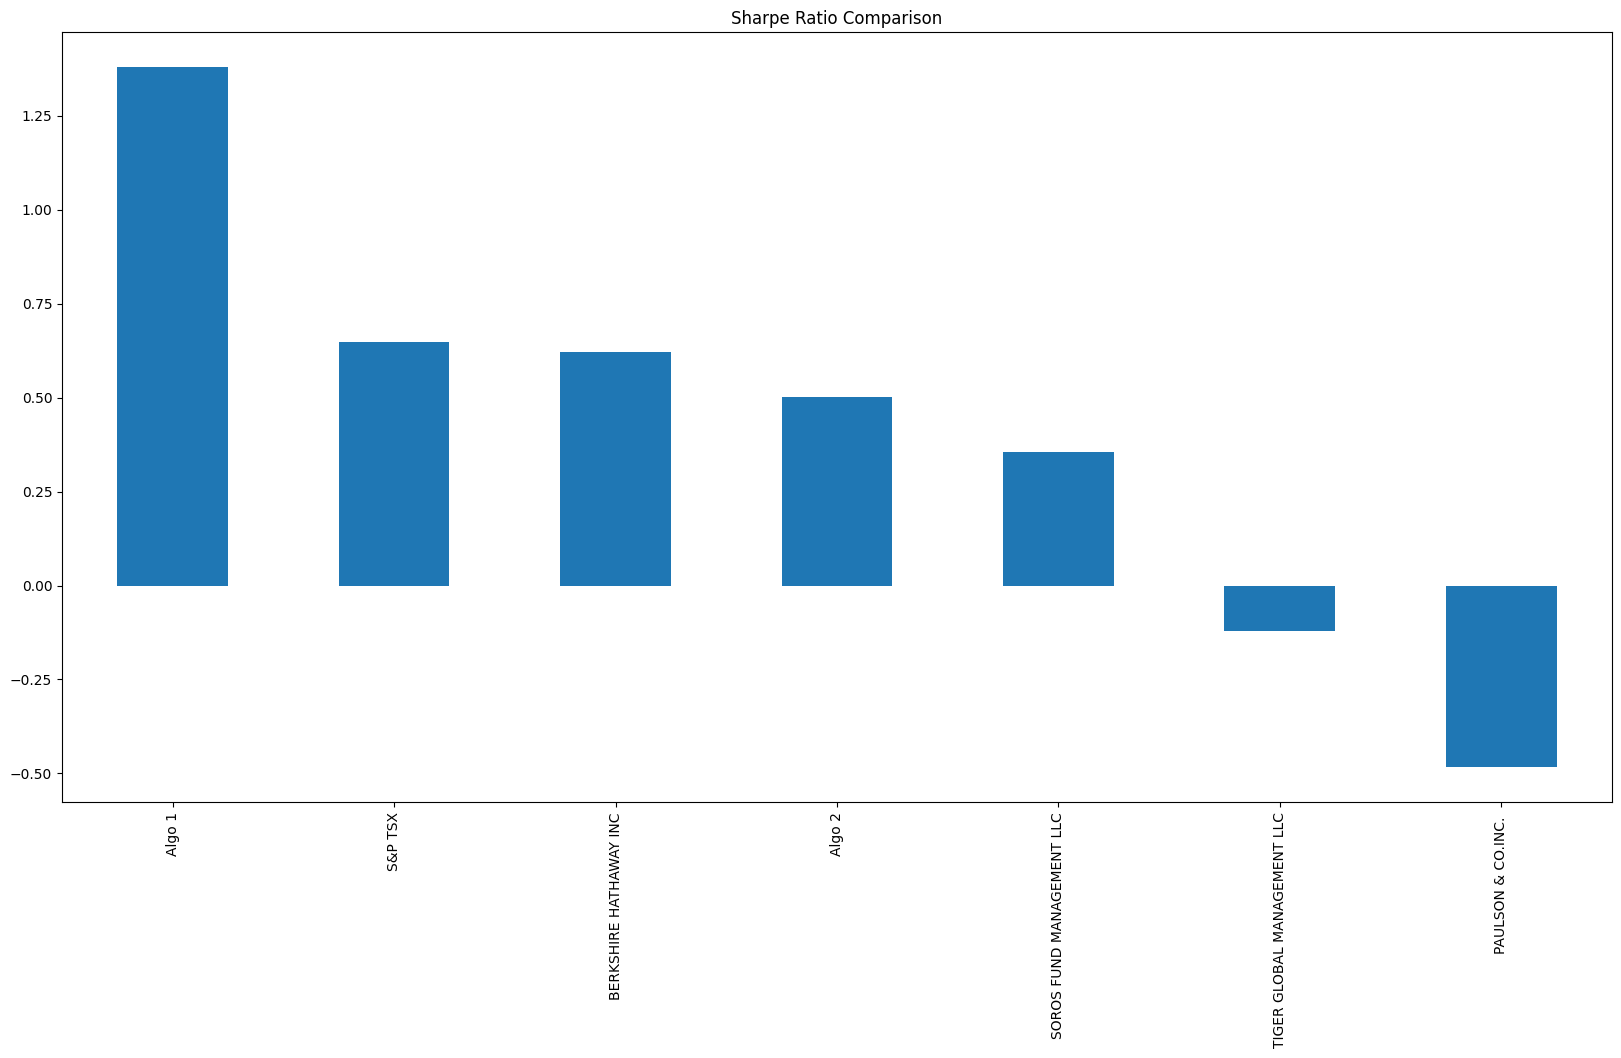

In [29]:
# Visualize the sharpe ratios as a bar plot
ax_sharpe_ratios = sharpe_ratios.plot.bar(figsize=(20, 10), title='Sharpe Ratio Comparison')
#Algo 1 out performs the market and the whales portfolios

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [30]:
# Create a custom Portfolio
# Connect to our service account
scope = ['https://spreadsheets.google.com/feeds']
credentials = ServiceAccountCredentials.from_json_keyfile_name('./sa_cred.json', scope)
gc = gspread.authorize(credentials)
##Get candidate data sheet from Google Drive
spreadsheet_key = '1dQNs-d9fFF4j6sZQjORiP1BhkZbmLnzHxW6toTA6NQU'
book = gc.open_by_key(spreadsheet_key)

# Reading data from 1st stock
#connect to nike worksheet
nike_ws = book.worksheet("Nike")
nike_table = nike_ws.get_all_values()
##Convert table data into a dataframe
nike_df = pd.DataFrame(nike_table[1:], columns=nike_table[0])
##Only keep columns we need
nike_df = nike_df[['Date', 'Close']]
##Convert number strings to floats and ints
nike_df = nike_df.apply(pd.to_numeric, errors='ignore')
##Convert date strings to datetime format
nike_df['Date'] = pd.to_datetime(nike_df['Date'],infer_datetime_format=True)

nike_df.set_index('Date', inplace=True)
nike_df.rename(columns={"Close": "Nike"}, inplace=True)
nike_df.index = nike_df.index.strftime('%Y-%m-%d')
nike_df.head()


,Nike
Date,
2015-01-02,47.52
2015-01-05,46.75
2015-01-06,46.48
2015-01-07,47.44
2015-01-08,48.53


In [31]:
# Reading data from 2nd stock
#connect to Amazon worksheet
amzn_ws = book.worksheet("Amazon")
amzn_table = amzn_ws.get_all_values()
##Convert table data into a dataframe
amzn_df = pd.DataFrame(amzn_table[1:], columns=amzn_table[0])
##Only keep columns we need
amzn_df = amzn_df[['Date', 'Close']]
##Convert number strings to floats and ints
amzn_df = amzn_df.apply(pd.to_numeric, errors='ignore')
##Convert date strings to datetime format
amzn_df['Date'] = pd.to_datetime(amzn_df['Date'],infer_datetime_format=True)
amzn_df.set_index('Date', inplace=True)
amzn_df.rename(columns={"Close": "Amazon"}, inplace=True)
amzn_df.index = amzn_df.index.strftime('%Y-%m-%d')
amzn_df.head()

,Amazon
Date,
2015-01-02,15.43
2015-01-05,15.11
2015-01-06,14.76
2015-01-07,14.92
2015-01-08,15.02


In [32]:
# Reading data from 3rd stock
#connect to IBM worksheet
ibm_ws = book.worksheet("IBM")
ibm_table = ibm_ws.get_all_values()
##Convert table data into a dataframe
ibm_df = pd.DataFrame(ibm_table[1:], columns=ibm_table[0])
##Only keep columns we need
ibm_df = ibm_df[['Date', 'Close']]
##Convert number strings to floats and ints
ibm_df = ibm_df.apply(pd.to_numeric, errors='ignore')
##Convert date strings to datetime format
ibm_df['Date'] = pd.to_datetime(ibm_df['Date'],infer_datetime_format=True)
ibm_df.set_index('Date', inplace=True)
ibm_df.rename(columns={"Close": "IBM"}, inplace=True)
ibm_df.index = ibm_df.index.strftime('%Y-%m-%d')
ibm_df.head()

,IBM
Date,
2015-01-02,154.79
2015-01-05,152.36
2015-01-06,149.07
2015-01-07,148.10
2015-01-08,151.32


In [33]:
#connect to SP500 worksheet
sp500_ws = book.worksheet("SP500")
sp500_table = sp500_ws.get_all_values()
##Convert table data into a dataframe
sp500_df = pd.DataFrame(sp500_table[1:], columns=sp500_table[0])
##Only keep columns we need
sp500_df = sp500_df[['Date', 'Close']]
##Convert number strings to floats and ints
sp500_df = sp500_df.apply(pd.to_numeric, errors='ignore')
##Convert date strings to datetime format
sp500_df['Date'] = pd.to_datetime(sp500_df['Date'],infer_datetime_format=True)
sp500_df.set_index('Date', inplace=True)
sp500_df.rename(columns={"Close": "SP500"}, inplace=True)
sp500_df.index = sp500_df.index.strftime('%Y-%m-%d')
sp500_df.head()

,SP500
Date,
2015-01-02,2058.20
2015-01-05,2020.58
2015-01-06,2002.61
2015-01-07,2025.90
2015-01-08,2062.14


In [34]:
# Combine all stocks in a single DataFrame
combined_goog_df_list=[nike_df,amzn_df,ibm_df, sp500_df]
combined_goog_df = pd.concat(combined_goog_df_list, axis=1, join="inner", sort=True)
combined_goog_df.head()

,Nike,Amazon,IBM,SP500
Date,,,,
2015-01-02,47.52,15.43,154.79,2058.20
2015-01-05,46.75,15.11,152.36,2020.58
2015-01-06,46.48,14.76,149.07,2002.61
2015-01-07,47.44,14.92,148.10,2025.90
2015-01-08,48.53,15.02,151.32,2062.14


In [35]:
# Reset Date index
# completed above

In [36]:
# Reorganize portfolio data by having a column per symbol
# completed above

In [37]:
# Calculate daily returns
daily_returns_new=combined_goog_df.pct_change()
# Drop NAs
daily_returns_new.dropna(inplace=True)
daily_returns_new.isna().sum()
# Display sample data
daily_returns_new.head()

,Nike,Amazon,IBM,SP500
Date,,,,
2015-01-05,-0.016204,-0.020739,-0.015699,-0.018278
2015-01-06,-0.005775,-0.023163,-0.021594,-0.008893
2015-01-07,0.020654,0.010840,-0.006507,0.011630
2015-01-08,0.022976,0.006702,0.021742,0.017888
2015-01-09,-0.010921,-0.011318,0.004362,-0.008404


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [38]:
# Set weights
weights = [1/3, 1/3, 1/3, 1/3]
# Calculate portfolio return
portfolio_returns_combined_df = daily_returns_new.dot(weights)
# Display sample data
portfolio_returns_combined_df.head()
# portfolio_returns_combined_df.plot(figsize=(20, 10), title='Daily Weighted Returns',legend=True)

Date
2015-01-05   -0.023640
2015-01-06   -0.019809
2015-01-07    0.012206
2015-01-08    0.023103
2015-01-09   -0.008761
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [39]:
# Join your returns DataFrame to the original returns DataFrame
combined_df_total_list=[portfolio_returns_combined_df, daily_returns_new]
combined_df_total = pd.concat(combined_df_total_list, axis=1, join="inner")
combined_df_total

,0,Nike,Amazon,IBM,SP500
Date,,,,,
2015-01-05,-0.023640,-0.016204,-0.020739,-0.015699,-0.018278
2015-01-06,-0.019809,-0.005775,-0.023163,-0.021594,-0.008893
2015-01-07,0.012206,0.020654,0.010840,-0.006507,0.011630
2015-01-08,0.023103,0.022976,0.006702,0.021742,0.017888
2015-01-09,-0.008761,-0.010921,-0.011318,0.004362,-0.008404
...,...,...,...,...,...
2022-05-24,-0.010858,-0.012335,-0.032168,0.020050,-0.008121
2022-05-25,0.016029,0.008482,0.025744,0.004410,0.009451
2022-05-26,0.040854,0.043808,0.040270,0.018603,0.019883


In [40]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_df_total.dropna(inplace=True)
combined_df_total.rename(columns={0: "Portfolio Returns"}, inplace=True)
combined_df_total

,Portfolio Returns,Nike,Amazon,IBM,SP500
Date,,,,,
2015-01-05,-0.023640,-0.016204,-0.020739,-0.015699,-0.018278
2015-01-06,-0.019809,-0.005775,-0.023163,-0.021594,-0.008893
2015-01-07,0.012206,0.020654,0.010840,-0.006507,0.011630
2015-01-08,0.023103,0.022976,0.006702,0.021742,0.017888
2015-01-09,-0.008761,-0.010921,-0.011318,0.004362,-0.008404
...,...,...,...,...,...
2022-05-24,-0.010858,-0.012335,-0.032168,0.020050,-0.008121
2022-05-25,0.016029,0.008482,0.025744,0.004410,0.009451
2022-05-26,0.040854,0.043808,0.040270,0.018603,0.019883


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [41]:
# Calculate the annualized `std`
daily_returns_new_ann_std=daily_returns_new.std()*np.sqrt(252)
daily_returns_new_ann_std

Nike      0.282042
Amazon    0.318953
IBM       0.249724
SP500     0.183766
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'Rolling StD 21(d) of Nike, Amazon, IBM'}, xlabel='Date'>

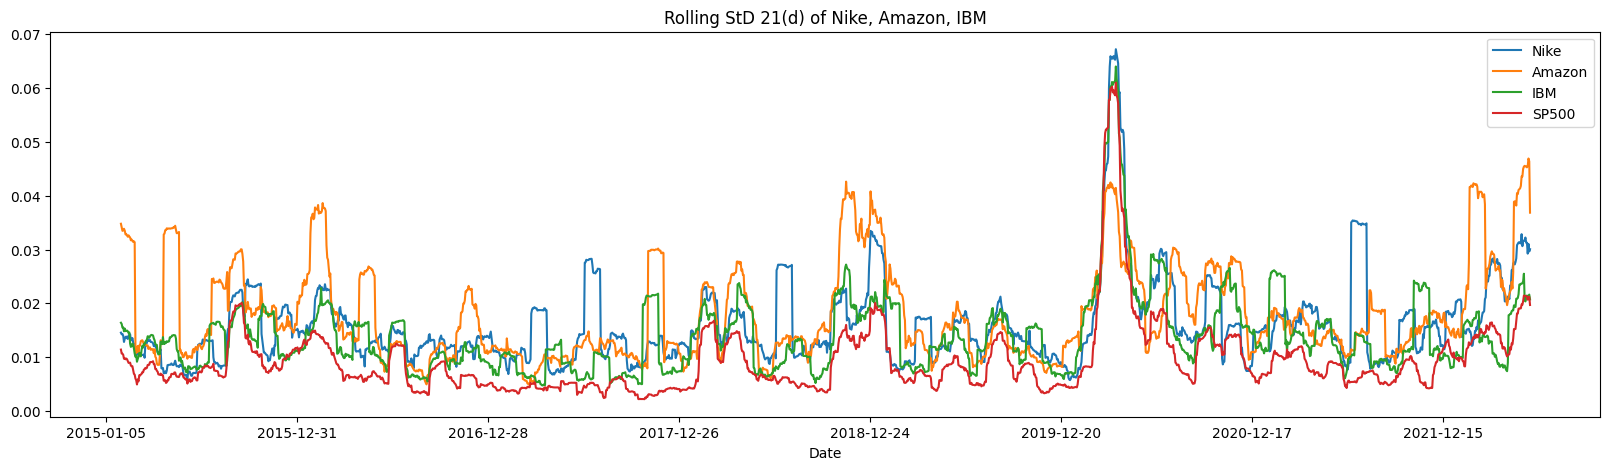

In [42]:
# Calculate rolling standard deviation
combined_df_roll_std_21W_goog=daily_returns_new.rolling(window=21).std()
# Plot rolling standard deviation
combined_df_roll_std_21W_goog.plot(figsize=(20,5),title="Rolling StD 21(d) of Nike, Amazon, IBM", legend=True)

### Calculate and plot the correlation

<AxesSubplot:>

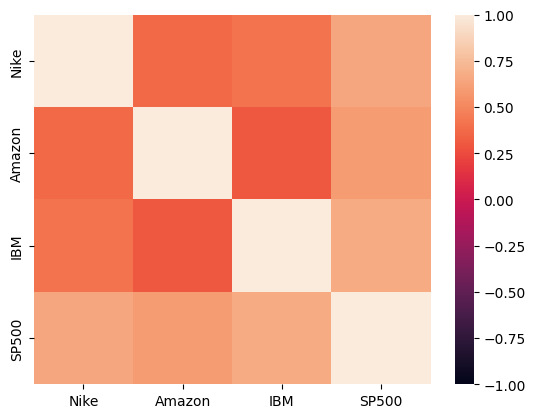

In [43]:
# Calculate and plot the correlation
correlation_new=daily_returns_new.corr()
# correlation.head(7)
sns.heatmap(correlation_new, vmin=-1, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

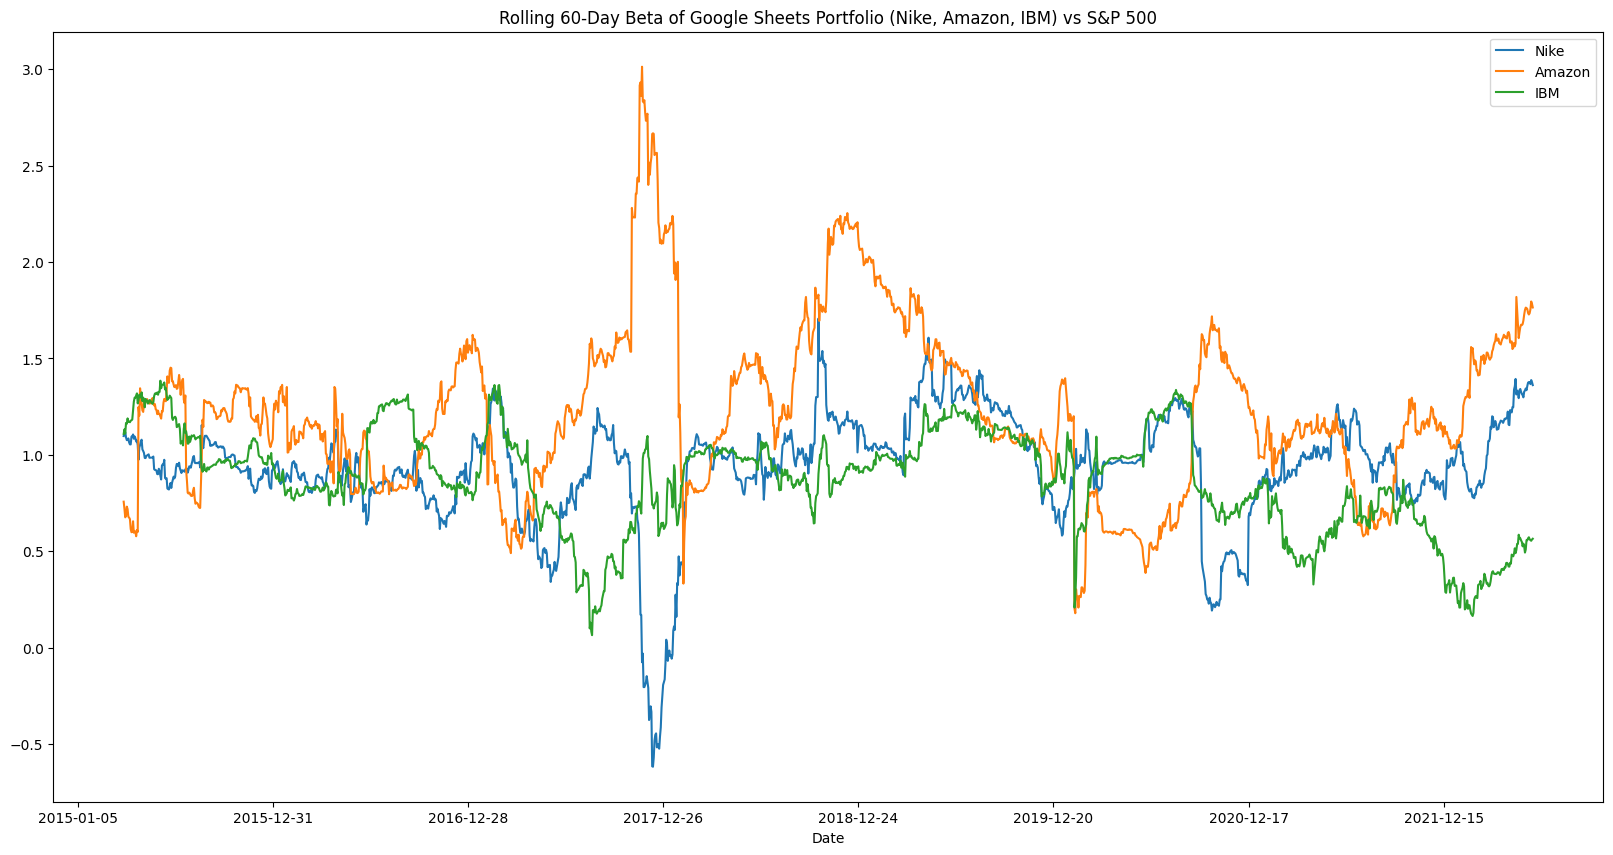

In [44]:
# Calculate and plot Beta

# Calculate covariance of all daily returns of Google Portfolio vs. S&P 500
daily_returns_new_stk=daily_returns_new[['Nike','Amazon','IBM']]
# portfolio_covariance = daily_returns_new_stk.cov(daily_returns_new['SP500'])
nike_portfolio_covariance = daily_returns_new_stk['Nike'].cov(daily_returns_new['SP500'])
amazon_portfolio_covariance = daily_returns_new_stk['Amazon'].cov(daily_returns_new['SP500'])
ibm_portfolio_covariance = daily_returns_new_stk['IBM'].cov(daily_returns_new['SP500'])

# # Calculate variance of all daily returns of S&P 500
variance = daily_returns_new['SP500'].var()

# # Calculate beta of all daily returns of each stock in portfolio 
nike_portfolio_beta = nike_portfolio_covariance / variance
amazon_portfolio_beta = amazon_portfolio_covariance / variance
ibm_portfolio_beta = ibm_portfolio_covariance / variance
# print(f"Nike Portfolio Beta Value: {nike_portfolio_beta} | Amazon Portfolio Beta Value: {amazon_portfolio_beta}  | IBM Portfolio Beta Value: {ibm_portfolio_beta} ")


# # # Calculate 60-day rolling covariance of Google Sheets Portfolio vs. S&P 500 and plot the data

# Not Used
# rolling_portfolio_covariance = daily_returns_new.rolling(window=60).cov(daily_returns_new['SP500'])
# # rolling_portfolio_covariance

# # # Calculate 60-day rolling variance of S&P 500
# rolling_variance = daily_returns_new['SP500'].rolling(window=60).var()
# # rolling_variance

# # Calculate 60-day rolling beta of portfolio and plot the data
# rolling_portfolio_beta = rolling_portfolio_covariance / rolling_variance
# rolling_portfolio_beta.dropna(inplace=True)
# rolling_portfolio_beta


rolling_nike_covariance = daily_returns_new['Nike'].rolling(window=60).cov(daily_returns_new['SP500'])
rolling_amazon_covariance = daily_returns_new['Amazon'].rolling(window=60).cov(daily_returns_new['SP500'])
rolling_ibm_covariance = daily_returns_new['IBM'].rolling(window=60).cov(daily_returns_new['SP500'])

# Calculate 60-day rolling variance of S&P 500
rolling_variance = daily_returns_new['SP500'].rolling(window=60).var()

# # Calculate 60-day rolling beta of portfolio and plot the data

rolling_nike_beta = rolling_nike_covariance / rolling_variance
rolling_amazon_beta = rolling_amazon_covariance / rolling_variance
rolling_ibm_beta = rolling_ibm_covariance / rolling_variance

# turn series into dataframes & rename columns
rolling_nike_beta_df=rolling_nike_beta.to_frame()
rolling_nike_beta_df.columns=["Nike"]
rolling_amazon_beta_df=rolling_amazon_beta.to_frame()
rolling_amazon_beta_df.columns=["Amazon"]
rolling_ibm_beta_df=rolling_ibm_beta.to_frame()
rolling_ibm_beta_df.columns=["IBM"]

# combine dataframe into one in order to represent the portfolio that contains those stocks
rolling_portfolio_beta_df_list=[rolling_nike_beta_df,rolling_amazon_beta_df, rolling_ibm_beta_df]
rolling_portfolio_beta_df = pd.concat(rolling_portfolio_beta_df_list, axis=1, join="inner")
rolling_portfolio_beta_df

# #plot
ax = rolling_portfolio_beta_df.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Google Sheets Portfolio (Nike, Amazon, IBM) vs S&P 500',legend=True)


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [45]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios_new = (daily_returns_new.mean() * 252) / (daily_returns_new.std() * np.sqrt(252))
sharpe_ratios_new.sort_values(ascending=False, inplace=True)

sharpe_ratios_dict_new=sharpe_ratios_new.to_dict()
sharpe_ratios_new

Amazon    1.028699
SP500     0.604934
Nike      0.579302
IBM       0.066738
dtype: float64

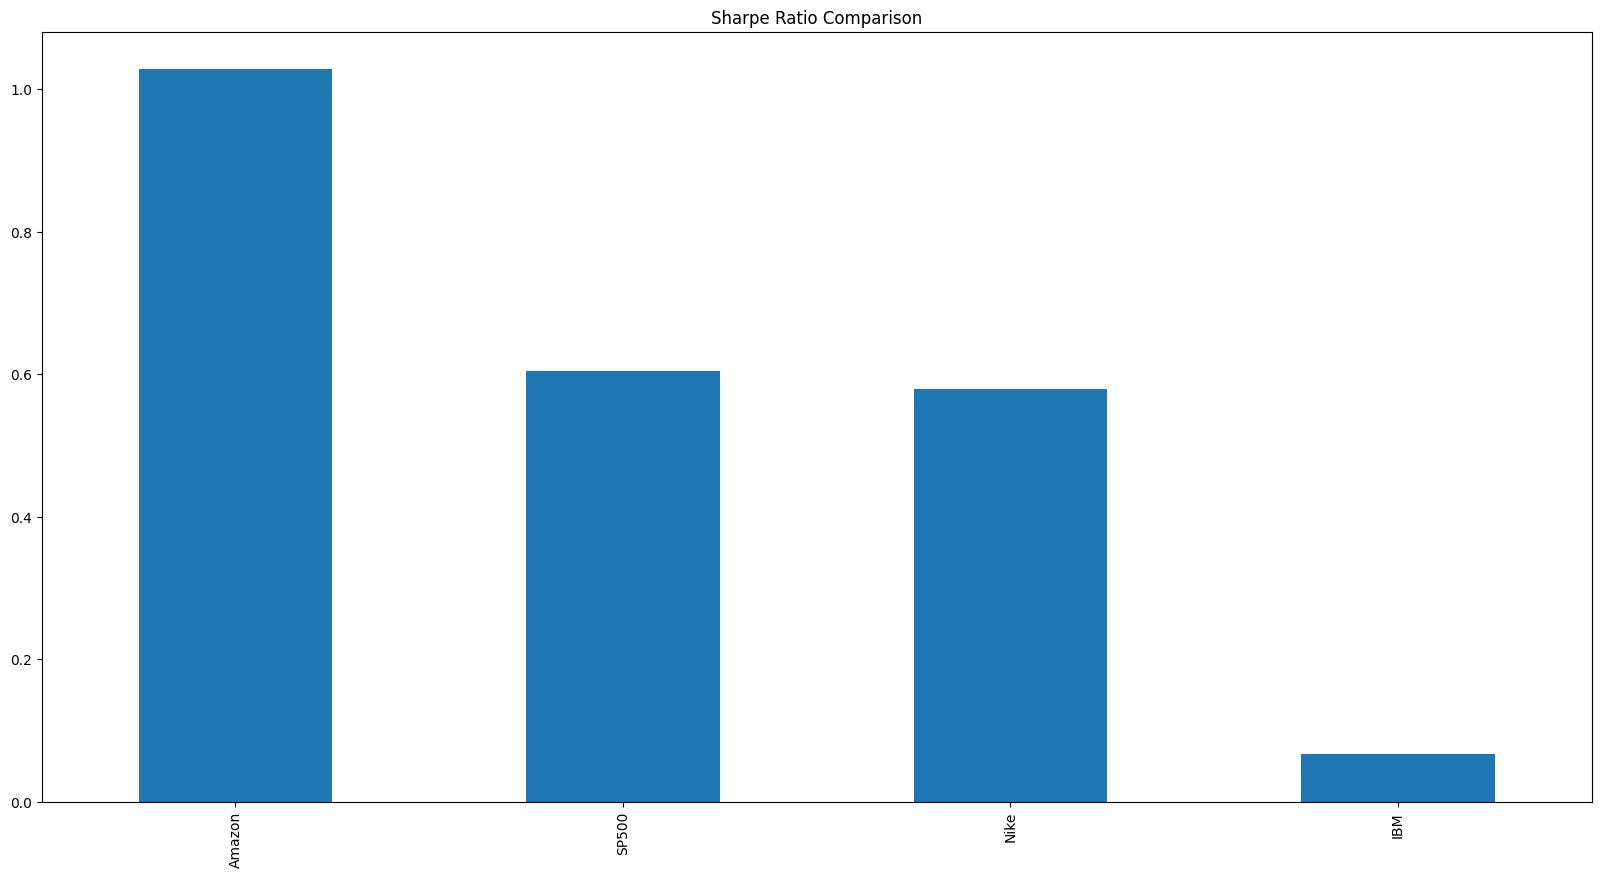

In [46]:
# Visualize the sharpe ratios as a bar plot
ax_sharpe_ratios_new = sharpe_ratios_new.plot.bar(figsize=(20, 10), title='Sharpe Ratio Comparison')

### How does your portfolio do?

Write your answer here!

In [47]:
# With Amazon and during the 2015-2022 period my portfolio beets the market on average